In [2]:
### Data cleaning: data from WHO and Worldbank data

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [43]:
#### countries we're interested in
countries = [
    "Angola",
    "Burundi",
    "Cameroon",
    "Central African Republic",
    "Chad",
    "Democratic Republic of the Congo",
    "Equatorial Guinea",
    "Gabon",
    "Republic of the Congo",
    "Rwanda",
    "São Tomé and Príncipe"
]

In [44]:
# medical doctors per 10,000
df_md = pd.read_csv("MD_10000.csv")
df_md.head()

df_md

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,HWF_0001,"Medical doctors (per 10,000)",numeric,AFR,Africa,Country,TCD,Chad,Year,2021,...,NaN,NaN,NaN,NaN,NaN,0.582,NaN,NaN,EN,2023-01-11T23:00:00.000Z
1,HWF_0001,"Medical doctors (per 10,000)",numeric,AFR,Africa,Country,TGO,Togo,Year,2021,...,NaN,NaN,NaN,NaN,NaN,0.585,NaN,NaN,EN,2023-01-11T23:00:00.000Z
2,HWF_0001,"Medical doctors (per 10,000)",numeric,WPR,Western Pacific,Country,PNG,Papua New Guinea,Year,2021,...,NaN,NaN,NaN,NaN,NaN,0.629,NaN,NaN,EN,2023-01-11T23:00:00.000Z
3,HWF_0001,"Medical doctors (per 10,000)",numeric,AFR,Africa,Country,BDI,Burundi,Year,2021,...,NaN,NaN,NaN,NaN,NaN,0.647,NaN,NaN,EN,2023-01-11T23:00:00.000Z
4,HWF_0001,"Medical doctors (per 10,000)",numeric,AFR,Africa,Country,MOZ,Mozambique,Year,2021,...,NaN,NaN,NaN,NaN,NaN,0.814,NaN,NaN,EN,2023-01-11T23:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,HWF_0001,"Medical doctors (per 10,000)",numeric,EMR,Eastern Mediterranean,Country,OMN,Oman,Year,1990,...,NaN,NaN,NaN,NaN,NaN,7.986,NaN,NaN,EN,2023-01-11T23:00:00.000Z
2899,HWF_0001,"Medical doctors (per 10,000)",numeric,AMR,Americas,Country,COL,Colombia,Year,1990,...,NaN,NaN,NaN,NaN,NaN,8.028,NaN,NaN,EN,2023-01-11T23:00:00.000Z
2900,HWF_0001,"Medical doctors (per 10,000)",numeric,WPR,Western Pacific,Country,KOR,Republic of Korea,Year,1990,...,NaN,NaN,NaN,NaN,NaN,8.110,NaN,NaN,EN,2023-01-11T23:00:00.000Z
2901,HWF_0001,"Medical doctors (per 10,000)",numeric,EUR,Europe,Country,TUR,Türkiye,Year,1990,...,NaN,NaN,NaN,NaN,NaN,9.322,NaN,NaN,EN,2023-01-11T23:00:00.000Z


In [5]:
for col in df_md.columns:
    print(col)

IndicatorCode
Indicator
ValueType
ParentLocationCode
ParentLocation
Location type
SpatialDimValueCode
Location
Period type
Period
IsLatestYear
Dim1 type
Dim1
Dim1ValueCode
Dim2 type
Dim2
Dim2ValueCode
Dim3 type
Dim3
Dim3ValueCode
DataSourceDimValueCode
DataSource
FactValueNumericPrefix
FactValueNumeric
FactValueUoM
FactValueNumericLowPrefix
FactValueNumericLow
FactValueNumericHighPrefix
FactValueNumericHigh
Value
FactValueTranslationID
FactComments
Language
DateModified


In [45]:
 df_md["IsLatestYear"]

0        True
1        True
2        True
3        True
4        True
        ...  
2898    False
2899    False
2900    False
2901    False
2902    False
Name: IsLatestYear, Length: 2903, dtype: bool

In [46]:
### keep data from latest year -> only work with this
## 195 countries
df_md_work = df_md[df_md["IsLatestYear"] == True]
df_md_work.shape

(195, 34)

In [47]:
### Keep variables of interest:
# Country, Country Code, Value of indicator, Year of data
df_md_work = df_md_work[["ParentLocation", "ParentLocationCode", "Location", "Value"]]

df_md_merge = df_md_work.rename(columns = {"Value" : "Medical Doctors per 10k inhabitants"})

df_md_merge.head()



,ParentLocation,ParentLocationCode,Location,Medical Doctors per 10k inhabitants
0,Africa,AFR,Chad,0.582
1,Africa,AFR,Togo,0.585
2,Western Pacific,WPR,Papua New Guinea,0.629
3,Africa,AFR,Burundi,0.647
4,Africa,AFR,Mozambique,0.814


In [12]:
df_under5 = pd.read_csv("under_five.csv")
df_under5.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,u5mr,Under-five mortality rate (deaths per 1000 liv...,numeric,AMR,Americas,Country,PER,Peru,Year,2020,...,NaN,NaN,11.39,NaN,16.53,14.0 [11.4-16.5],NaN,NaN,EN,2022-05-25T22:00:00.000Z
1,u5mr,Under-five mortality rate (deaths per 1000 liv...,numeric,AMR,Americas,Country,PER,Peru,Year,2020,...,NaN,NaN,17.23,NaN,32.43,24.8 [17.2-32.4],NaN,NaN,EN,2022-05-25T22:00:00.000Z
2,u5mr,Under-five mortality rate (deaths per 1000 liv...,numeric,AFR,Africa,Country,LBR,Liberia,Year,2019,...,NaN,NaN,89.56,NaN,129.10,109.3 [89.6-129.1],NaN,NaN,EN,2022-05-25T22:00:00.000Z
3,u5mr,Under-five mortality rate (deaths per 1000 liv...,numeric,WPR,Western Pacific,Country,TON,Tonga,Year,2019,...,NaN,NaN,5.23,NaN,16.99,11.1 [5.2-17.0],NaN,NaN,EN,2022-05-25T22:00:00.000Z
4,u5mr,Under-five mortality rate (deaths per 1000 liv...,numeric,AFR,Africa,Country,TCD,Chad,Year,2019,...,NaN,NaN,106.40,NaN,121.50,113.9 [106.4-121.5],NaN,NaN,EN,2022-05-25T22:00:00.000Z


In [ ]:
### check if all needed countries are present in data set
print(df_under5["Location"].unique())

In [25]:
df_under5.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1',
       'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type',
       'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource',
       'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM',
       'FactValueNumericLowPrefix', 'FactValueNumericLow',
       'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value',
       'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'],
      dtype='object')

In [36]:
df_under5_work = df_under5[df_under5["IsLatestYear"] == True]
print(df_under5_work.shape)

# drop Na rows
df_under5_work = df_under5_work.dropna(subset=['FactValueNumeric'])

df_under5_work["FactValueNumeric"]


(234, 34)


0       13.96
1       24.83
2      109.30
3       11.11
4      113.90
        ...  
528     75.97
669     51.02
672     72.69
806     54.72
810     64.18
Name: FactValueNumeric, Length: 175, dtype: float64

In [40]:
## under 5 mortality is reported for two maternal age groups in some countries:
## first approach: take the mean of the two values

# set country as index or reset_index() after grouping
group_df = df_under5_work.groupby("Location").mean(numeric_only=True)
group_df.columns

# get Location back as column to match later on
group_df = group_df.reset_index()

## only keep important columns and drop rows where no FactValueNumeric is present
df_under5_merge = group_df[["Location", "Period", "FactValueNumeric"]]

In [41]:
df_under5_merge

df_under5_merge = df_under5_merge.rename(columns = {"FactValueNumeric" : "Infant mortality per 1000 live births"})

df_under5_merge

,Location,Period,Infant mortality per 1000 live births
0,Afghanistan,2015.0,61.180
1,Albania,2017.0,8.445
2,Algeria,2018.0,24.550
3,Angola,2015.0,81.745
4,Armenia,2015.0,13.405
...,...,...,...
85,United Republic of Tanzania,2015.0,83.115
86,Viet Nam,2013.0,8.403
87,Yemen,2013.0,66.005
88,Zambia,2018.0,69.965


In [48]:
### Match the Medical doctors and the infant mortality data set
# only keep rows where both data sets has rows
WHO_data = pd.merge(df_md_merge, df_under5_merge, on='Location', how='inner')

WHO_data.head()

,ParentLocation,ParentLocationCode,Location,Medical Doctors per 10k inhabitants,Period,Infant mortality per 1000 live births
0,Africa,AFR,Chad,0.582,2019.0,118.100
1,Africa,AFR,Togo,0.585,2017.0,80.360
2,Western Pacific,WPR,Papua New Guinea,0.629,2016.0,63.520
3,Africa,AFR,Burundi,0.647,2016.0,88.820
4,Africa,AFR,Mozambique,0.814,2015.0,48.025


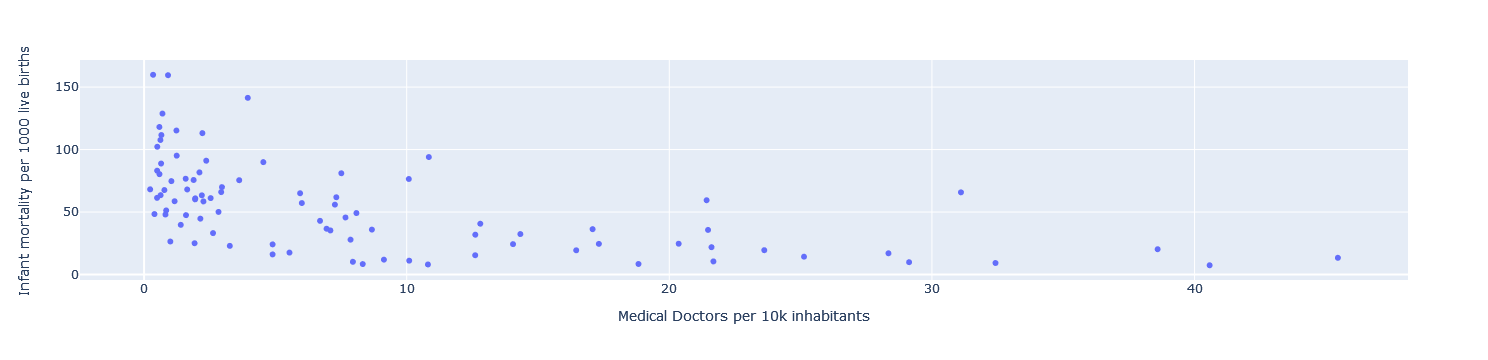

In [51]:
## scatter plot MD and infant mortality

fig = px.scatter(WHO_data, x="Medical Doctors per 10k inhabitants", y="Infant mortality per 1000 live births",
                hover_data=['Location'])
fig.show()


In [53]:
### create subset of central africa
WHO_central = WHO_data[WHO_data['Location'].isin(countries)]

WHO_central.head(11)

,ParentLocation,ParentLocationCode,Location,Medical Doctors per 10k inhabitants,Period,Infant mortality per 1000 live births
0,Africa,AFR,Chad,0.582,2019.0,118.100
3,Africa,AFR,Burundi,0.647,2016.0,88.820
5,Africa,AFR,Cameroon,1.242,2018.0,95.135
41,Africa,AFR,Gabon,5.941,2012.0,65.060
47,Africa,AFR,Rwanda,1.162,2019.0,58.655
62,Africa,AFR,Central African Republic,0.658,2018.0,111.610
69,Africa,AFR,Angola,2.108,2015.0,81.745
73,Africa,AFR,Democratic Republic of the Congo,3.622,2017.0,75.495
